In [1]:
%matplotlib inline
import numpy
import sympy
sympy.init_printing()  # to get nice latex-formatted output

# README

This notebook is based on the Firedrake Navier Stokes demo [1] - a worked example of solving the Navier Stoken equations using Taylor-Hood elements. We will work through the demo and then attempt to produce our own solution for a 2D T-shaped and then H-shaped example flow.

!!!!!!!!!!!!!!    PLEASE RUN WITH PYTHONDRAKE KERNEL    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!

[1] http://www.firedrakeproject.org/demos/navier_stokes.py.html

# Time-INDEP Demo

We solve the Navier-Stokes equations on a lid-driven cavity.

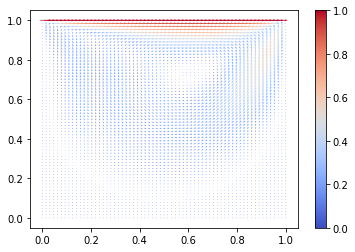

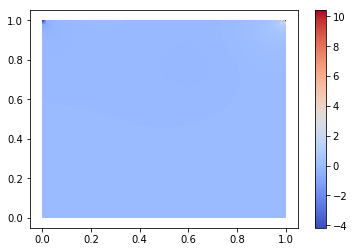

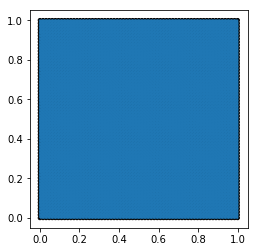

In [5]:
from firedrake import *

N = 64

M = UnitSquareMesh(N,N)

V = VectorFunctionSpace(M, "CG", 2)
W = FunctionSpace(M, "CG", 1)
Z = V * W

up_ = Function(Z)
up  = Funztion(Z)
u_, p_ = split(up)
u, p = split(up_)
v, q = TestFunctions(Z)

Re = Constant(100.0)

F = (
    1.0 / Re * inner(grad(u), grad (v)) * dx + 
    inner(dot(grad(u), u), v) * dx - 
    p * div(v) * dx +
    div(u) * q * dx
)

bcs = [DirichletBC(Z.sub(0), Constant((1,0 )), (4,)),
      DirichletBC(Z.sub(0), Constant((0, 0)), (1, 2, 3))]

nullspace = MixedVectorSpaceBasis(Z, [Z.sub(0), VectorSpaceBasis(constant=True)])

appctx = {"Re": Re, "velocity_space": 0}

parameters = {"mat_type": "matfree",
              "snes_monitor": True,
              "ksp_type": "fgmres",
              "ksp_gmres_modifiedgramschmidt": True,
              "ksp_monitor_true_residual" :True,
              "pc_type": "fieldsplit",
              "pc_fieldsplit_type": "schur",
              "pc_fieldsplit_schur_fact_type": "lower",
              "fieldsplit_0_ksp_type": "preonly",
              "fieldsplit_0_pc_type": "python",
              "fieldsplit_0_pc_python_type": "firedrake.AssembledPC",
              "fieldsplit_0_assembled_pc_type": "lu",
              "fieldsplit_1_ksp_type": "gmres",
              "fieldsplit_1_ksp_rtol": 1e-4,
              "fieldsplit_1_pc_type": "python",
              "fieldsplit_1_pc_python_type": "firedrake.PCDPC",
              "fieldsplit_1_pcd_Mp_ksp_type": "preonly",
              "fieldsplit_1_pcd_Mp_pc_type": "lu",
              "fieldsplit_1_pcd_Kp_ksp_type": "preonly",
              "fieldsplit_1_pcd_Kp_pc_type": "lu",
              "fieldsplit_1_pcd_Fp_mat_type": "matfree"}

up.assign(0)

solve(F == 0, up, bcs=bcs, nullspace=nullspace, solver_parameters=parameters, appctx=appctx)


u, p = up.split()
u.rename("Velocity")
p.rename("Pressure")

File("/home/alexander/Documents/QMEE/Firedrake Learning/NS_tutorial_saves/cavity.pvd").write(u,p)


plot(u)
plot(p)
plot(M)